# Requirements
- numpy
- matplotlib
- palettable
- util.py (included in repo)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *

from palettable.cartocolors.qualitative import Prism_7

# Helper functions

In [6]:
# Compute minimum feasible sensitivity
def min_sens(prev, spec, R0=3):
    return (R0-1)*(1-prev)*(1-spec)/prev

In [7]:
# Compute minimum specificity if sensitivity is perfect
def sp_when_perfect_sens(prev,R0):
    return 1-(prev/((R0-1)*(1-prev)))

In [8]:
# Compute positive predictive value
# i.e. the fraction of true positives among the test positives
def pos_enrichment(prev,sens,spec):
    a = sens*prev
    b = (1-spec)*(1-prev)
    return a/(a+b)

In [9]:
# Compute minimum feasible specificity
def min_spec(sens,prev,R0):
    return 1-(prev/((R0-1)*(1-prev)))*sens

In [10]:
# Compute minimum feasible prevalence
def min_prev(sens,spec,R0):
    herd = 1-1/R0
    num = herd*(1-spec)
    denom = sens - herd*(sens+spec-1)
    return num/denom

# Calculations in manuscript

For example, applied to a population with 4% seroprevalence, even a test with 98.5% specificity and perfect sensitivity would produce a passport-holding population with only 73.5% true seropositive individuals.

In [11]:
pos_enrichment(prev=0.04, spec=0.985, sens=1)

0.7352941176470587

If the test sensitivity was 90%, only 71.4% of passport holders would be seropositive.

In [12]:
pos_enrichment(prev=0.04, spec=0.985, sens=0.9)

0.7142857142857142

An immunity passports program in a city with 4% seroprevalence could work for a test with at least 98.5% specificity and 72% sensitivity

In [13]:
min_sens(prev=0.04,spec=0.985,R0=3)

0.7200000000000005

A test of 98.5% specificity and 72% sensitivity cannot be relied on for populations with prevalence below 4% at an R0=3

In [14]:
pos_enrichment(prev=0.04, spec=0.985, sens=0.72)

0.6666666666666665

For R0=2.5 and the same test specificity of 98.5%, the test sensitivity required to maintain herd immunity among the ‘immune passport’ carriers is only 54%, while for R0=3.5 the corresponding sensitivity requirement is 90%, and for the recent estimate of R0=5.7

In [15]:
min_sens(prev=0.04,spec=0.985,R0=2.5)

0.5400000000000005

In [16]:
min_sens(prev=0.04,spec=0.985,R0=3.5)

0.9000000000000008

In [17]:
min_sens(prev=0.04,spec=0.985,R0=5.7)

1.6920000000000015

With a 99% specific and 100% sensitive test, a community with R0=3.5 requires at least a seroprevalence of 2.5% 

In [18]:
min_prev(sens=1,spec=0.99,R0=3.5)

0.02439024390243905

A test with 98.5% specificity in the same community requires at least a 3.7% seroprevalence.

In [19]:
min_prev(sens=1,spec=0.985,R0=3.5)

0.03614457831325304

# Figure

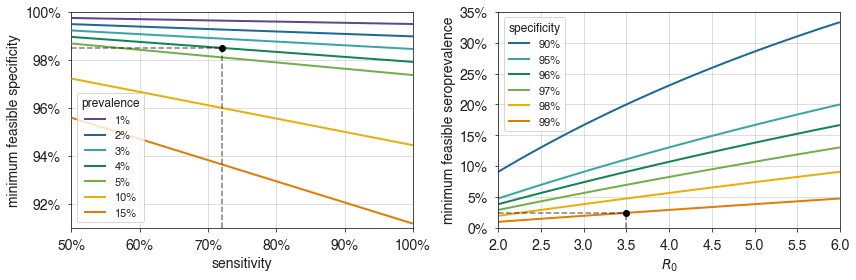

In [20]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax = axs[0]
R0=3
ax.set_prop_cycle('color', Prism_7.mpl_colors)
sens = np.linspace(0.5,1.0,1000)
for prev in [0.01,0.02,0.03,0.04,0.05,0.1,0.15]:
    psp = np.round(sp_when_perfect_sens(prev,R0),2)
    spec = min_spec(sens,prev,R0=R0)
    ax.plot(sens,spec,
            lw=2,
           label='{}%'.format(int(prev*100)),
        zorder=5)
sp = 0.985
se = min_sens(spec=sp,R0=R0,prev=0.04)
ax.scatter(se,sp,color='black',marker='o',zorder=10)
ax.plot([0.5,se],[sp,sp],color='black',linestyle='--',alpha=0.5,zorder=9)
ax.plot([se,se],[0.91,sp],color='black',linestyle='--',alpha=0.5,zorder=9)


ax.set_ylabel('minimum feasible specificity')
ax.set_xlabel('sensitivity')
leg = ax.legend(title='prevalence',loc='lower left',fontsize=11)
leg.get_title().set_fontsize(12)
ax.set_ylim([0.91,1])
ax.set_xlim([0.5,1])

ax.tick_params(direction='out')
fontsize= 14
labelpad = 7
ax.tick_params(axis='both', which='major', labelsize=fontsize, pad=labelpad)
ax.yaxis.label.set_size(fontsize)
ax.xaxis.label.set_size(fontsize)

z = ax.get_xticks()
ax.set_xticklabels(['{}%'.format(int(x*100)) for x in z])
z = ax.get_yticks()
ax.set_yticklabels(['{}%'.format(int(x*100)) for x in z])
ax.grid(alpha=0.5,zorder=0)
plt.tight_layout()

ax = axs[1]
ax.set_prop_cycle('color', Prism_7.mpl_colors)
ax.plot([],[])
sens = 1
R0 = np.linspace(2,6,100)
for spec in [0.9,0.95,0.96,0.97,0.98,0.99]:
    t = ax.plot(R0,min_prev(sens,spec,R0),
            label='{}%'.format(int(100*spec)),
            lw=2,zorder=2)


    se = 1
sp = 0.99
r0 = 3.5
theta = min_prev(se,sp,r0)    

ax.scatter(r0,theta,color='black',marker='o',zorder=10)
ax.plot([2.0,r0],[theta,theta],color='black',linestyle='--',alpha=0.5,zorder=9)
ax.plot([r0,r0],[0,theta],color='black',linestyle='--',alpha=0.5,zorder=9)


ax.set_ylim(bottom=0)
xmin = np.min(R0)
xmax = np.max(R0)
ax.set_xlim([xmin,xmax])
ax.set_ylabel('minimum feasible seroprevalence')
ax.set_xlabel('$R_0$')
ax.set_yticklabels(['{}%'.format(int(t*100)) for t in ax.get_yticks()])
ax.grid(alpha=0.5,zorder=-1)
leg = ax.legend(title='specificity',loc='upper left',fontsize=11)
leg.get_title().set_fontsize(12)

ax.tick_params(direction='out')
fontsize= 14
labelpad = 7
ax.tick_params(axis='both', which='major', labelsize=fontsize, pad=labelpad)
ax.yaxis.label.set_size(fontsize)
ax.xaxis.label.set_size(fontsize)

plt.tight_layout()
# plt.savefig('figure.pdf')